# Załadowanie potrzebnych bibliotek

### Wyjaśnienie kodu

Ten kod importuje kilka bibliotek i modułów niezbędnych do analizy danych, wizualizacji oraz budowania i oceny modelu sieci konwolucyjnej.

#### Importy NumPy, Matplotlib i Seaborn:

1. **Importy NumPy:**
   - `import numpy as np`: Importuje bibliotekę NumPy, która jest używana do operacji numerycznych na tablicach. NumPy jest podstawową biblioteką do obliczeń naukowych w Pythonie, oferującą wsparcie dla dużych, wielowymiarowych tablic i macierzy oraz szeroki zestaw funkcji matematycznych do pracy z nimi.

2. **Importy Matplotlib:**
   - `import matplotlib.pyplot as plt`: Importuje bibliotekę Matplotlib do tworzenia wykresów i wizualizacji danych. Matplotlib jest wszechstronnym narzędziem do tworzenia statycznych, animowanych i interaktywnych wizualizacji w Pythonie.

3. **Importy Seaborn:**
   - `import seaborn as sns`: Importuje bibliotekę Seaborn, która jest używana do tworzenia bardziej zaawansowanych i estetycznych wizualizacji danych. Seaborn jest zbudowany na bazie Matplotlib i oferuje wyższy poziom abstrakcji dla tworzenia atrakcyjnych wizualizacji statystycznych.

#### Importy TensorFlow i Keras:

4. **Importy TensorFlow:**
   - `import tensorflow as tf`: Importuje bibliotekę TensorFlow, która jest używana do budowania i trenowania modeli uczenia maszynowego i głębokiego uczenia. TensorFlow jest wszechstronną biblioteką open-source do obliczeń numerycznych, która umożliwia łatwe tworzenie i trenowanie modeli głębokiego uczenia.

5. **Importy Keras:**
   - `from tensorflow.keras.preprocessing.image import ImageDataGenerator`: Importuje klasę `ImageDataGenerator` z modułu Keras w TensorFlow, która jest używana do generowania wsadowych danych obrazowych z augmentacją w locie. `ImageDataGenerator` umożliwia łatwe przekształcanie i augmentację obrazów podczas treningu modelu.
   - `from tensorflow.keras.models import Sequential`: Importuje klasę `Sequential` z modułu Keras w TensorFlow, która jest używana do tworzenia sekwencyjnych modeli sieci neuronowych. `Sequential` umożliwia łatwe budowanie modeli warstwa po warstwie.
   - `from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization`: Importuje różne warstwy z modułu Keras w TensorFlow, które są używane do budowania sieci konwolucyjnych:
     - `Conv2D`: Warstwa konwolucyjna 2D, która jest używana do ekstrakcji cech z obrazów.
     - `MaxPooling2D`: Warstwa maksymalnego próbkowania 2D, która jest używana do redukcji wymiarów cech i zmniejszenia liczby parametrów w sieci.
     - `Flatten`: Warstwa spłaszczająca, która przekształca wielowymiarowe dane wejściowe na jednowymiarowy wektor.
     - `Dense`: Warstwa gęsta (w pełni połączona), która jest używana do klasyfikacji na podstawie wyodrębnionych cech.
     - `Dropout`: Warstwa dropout, która jest używana do regularizacji modelu poprzez losowe wyłączanie neuronów podczas treningu, co pomaga w zapobieganiu przeuczeniu.
     - `BatchNormalization`: Warstwa normalizacji wsadowej, która jest używana do normalizacji aktywacji warstw w sieci, co przyspiesza trening i stabilizuje proces uczenia.

6. **Importy Keras Callbacks:**
   - `from tensorflow.keras.callbacks import EarlyStopping`: Importuje klasę `EarlyStopping` z modułu Keras w TensorFlow, która jest używana do wczesnego zatrzymywania treningu modelu, gdy wydajność na zbiorze walidacyjnym przestaje się poprawiać. `EarlyStopping` pomaga w zapobieganiu przeuczeniu modelu.

#### Importy z Scikit-learn:

7. **Importy z Scikit-learn:**
   - `from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score`: Importuje funkcje `confusion_matrix`, `accuracy_score`, `precision_score`, `recall_score` i `f1_score` z modułu Scikit-learn, które są używane do oceny wydajności modelu. Te funkcje umożliwiają obliczanie różnych metryk oceny, takich jak macierz konfuzji, dokładność, precyzja, czułość i F1-score, które są kluczowe do oceny jakości modelu klasyfikacyjnego.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Definiowanie ścieżek do katalogów z danymi

### Wyjaśnienie kodu

Ten kod definiuje ścieżki do katalogów zawierających dane treningowe, walidacyjne i testowe. Te ścieżki są używane do ładowania i przetwarzania obrazów z odpowiednich katalogów.

1. **Ścieżka do katalogu treningowego:**
   - `train_dir = 'chest_xray/train'`: Definiuje zmienną `train_dir`, która przechowuje ścieżkę do katalogu zawierającego dane treningowe. Katalog train zawiera obrazy rentgenowskie klatki piersiowej, które będą używane do trenowania modelu. Dane treningowe są używane do dopasowania modelu i nauczenia go rozpoznawania wzorców w danych.

2. **Ścieżka do katalogu walidacyjnego:**
   - `val_dir = 'chest_xray/val'`: Definiuje zmienną `val_dir`, która przechowuje ścieżkę do katalogu zawierającego dane walidacyjne. Katalog val zawiera obrazy rentgenowskie klatki piersiowej, które będą używane do walidacji modelu podczas treningu. Dane walidacyjne są używane do monitorowania wydajności modelu na danych, które nie były używane do treningu, co pomaga w ocenie, czy model nie przeucza się na danych treningowych.

3. **Ścieżka do katalogu testowego:**
   - `test_dir = 'chest_xray/test'`: Definiuje zmienną `test_dir`, która przechowuje ścieżkę do katalogu zawierającego dane testowe. Katalog test zawiera obrazy rentgenowskie klatki piersiowej, które będą używane do ostatecznej oceny modelu po zakończeniu treningu. Dane testowe są używane do oceny ogólnej wydajności modelu na nowych, niewidzianych wcześniej danych, co pozwala na sprawdzenie, jak dobrze model generalizuje.

In [3]:
train_dir = 'chest_xray/train'
val_dir = 'chest_xray/val'
test_dir = 'chest_xray/test'

# Przygotowanie danych z augmentacją

### Wyjaśnienie kodu

Ten kod przygotowuje dane obrazowe do treningu, walidacji i testowania modelu sieci konwolucyjnej, wykorzystując technikę augmentacji danych. Augmentacja danych polega na tworzeniu nowych, zmodyfikowanych wersji obrazów w locie, co pomaga zwiększyć różnorodność danych treningowych i zapobiega przeuczeniu modelu.

#### Przygotowanie generatora danych treningowych z augmentacją:

1. **Definicja generatora danych treningowych z augmentacją:**
   - `train_datagen = ImageDataGenerator(...)`: Tworzy instancję klasy `ImageDataGenerator` z różnymi parametrami augmentacji. `ImageDataGenerator` jest używany do generowania wsadowych danych obrazowych z augmentacją w locie.

2. **Parametry augmentacji:**
   - `rescale=1./255`: Skaluje wartości pikseli obrazów do zakresu [0, 1] poprzez podzielenie przez 255. Jest to standardowa praktyka w przetwarzaniu obrazów, która pomaga w normalizacji danych.
   - `rotation_range=20`: Losowo obraca obrazy w zakresie 20 stopni. Obracanie obrazów pomaga modelowi nauczyć się rozpoznawać obiekty niezależnie od ich orientacji.
   - `width_shift_range=0.2`: Losowo przesuwa obrazy w poziomie w zakresie 20% szerokości obrazu. Przesuwanie obrazów pomaga modelowi nauczyć się rozpoznawać obiekty w różnych pozycjach poziomych.
   - `height_shift_range=0.2`: Losowo przesuwa obrazy w pionie w zakresie 20% wysokości obrazu. Przesuwanie obrazów pomaga modelowi nauczyć się rozpoznawać obiekty w różnych pozycjach pionowych.
   - `shear_range=0.2`: Losowo stosuje transformację ścinania do obrazów w zakresie 20%. Transformacja ścinania zmienia kształt obrazu, co pomaga modelowi nauczyć się rozpoznawać obiekty niezależnie od ich kształtu.
   - `zoom_range=0.2`: Losowo powiększa lub pomniejsza obrazy w zakresie 20%. Zoomowanie obrazów pomaga modelowi nauczyć się rozpoznawać obiekty w różnych skalach.
   - `horizontal_flip=True`: Losowo odwraca obrazy w poziomie. Odwracanie obrazów pomaga modelowi nauczyć się rozpoznawać obiekty niezależnie od ich orientacji poziomej.
   - `fill_mode='nearest'`: Określa sposób wypełniania pikseli poza granicami obrazu po zastosowaniu transformacji. `nearest` oznacza, że piksele poza granicami obrazu są wypełniane wartościami najbliższych pikseli.

#### Przygotowanie generatorów danych walidacyjnych i testowych:

3. **Definicja generatora danych walidacyjnych:**
   - `val_datagen = ImageDataGenerator(rescale=1./255)`: Tworzy instancję klasy `ImageDataGenerator` do przetwarzania danych walidacyjnych. Dane walidacyjne są skalowane do zakresu [0, 1], ale nie są poddawane augmentacji, ponieważ augmentacja jest zwykle stosowana tylko do danych treningowych.

4. **Definicja generatora danych testowych:**
   - `test_datagen = ImageDataGenerator(rescale=1./255)`: Tworzy instancję klasy `ImageDataGenerator` do przetwarzania danych testowych. Dane testowe są skalowane do zakresu [0, 1], ale nie są poddawane augmentacji, ponieważ augmentacja jest zwykle stosowana tylko do danych treningowych.

#### Tworzenie generatorów danych:

5. **Tworzenie generatora danych treningowych:**
   - `train_generator = train_datagen.flow_from_directory(...)`: Tworzy generator danych treningowych z katalogu `train_dir` za pomocą `train_datagen`. Generator ten będzie w locie przetwarzał i augmentował obrazy podczas treningu modelu.
   - `target_size=(150, 150)`: Ustawia docelowy rozmiar obrazów na 150x150 pikseli. Wszystkie obrazy zostaną przeskalowane do tego rozmiaru.
   - `batch_size=32`: Ustawia rozmiar wsadu na 32 obrazy. Generator będzie dostarczał wsady po 32 obrazy do modelu podczas treningu.
   - `class_mode='binary'`: Ustawia tryb klasyfikacji na binarny. Oznacza to, że generator będzie dostarczał etykiety binarne (0 lub 1) dla obrazów, co jest odpowiednie dla problemu klasyfikacji binarnej (zdrowy vs. zapalenie płuc).

6. **Tworzenie generatora danych walidacyjnych:**
   - `val_generator = val_datagen.flow_from_directory(...)`: Tworzy generator danych walidacyjnych z katalogu `val_dir` za pomocą `val_datagen`. Generator ten będzie dostarczał przetworzone obrazy do modelu podczas walidacji.
   - `target_size=(150, 150)`: Ustawia docelowy rozmiar obrazów na 150x150 pikseli.
   - `batch_size=32`: Ustawia rozmiar wsadu na 32 obrazy.
   - `class_mode='binary'`: Ustawia tryb klasyfikacji na binarny.

7. **Tworzenie generatora danych testowych:**
   - `test_generator = test_datagen.flow_from_directory(...)`: Tworzy generator danych testowych z katalogu `test_dir` za pomocą `test_datagen`. Generator ten będzie dostarczał przetworzone obrazy do modelu podczas testowania.
   - `target_size=(150, 150)`: Ustawia docelowy rozmiar obrazów na 150x150 pikseli.
   - `batch_size=32`: Ustawia rozmiar wsadu na 32 obrazy.
   - `class_mode='binary'`: Ustawia tryb klasyfikacji na binarny.
   - `shuffle=False`: Wyłącza losowe mieszanie obrazów. Kolejność obrazów w generatorze testowym pozostaje taka sama, co jest ważne dla oceny modelu i porównywania wyników.

In [4]:
# Przygotowanie danych z augmentacją
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Wizualizacja danych
Utwórz kilka wizualizacji, aby lepiej zrozumieć dane obrazowe, np. wyświetl kilka przykładowych obrazów.

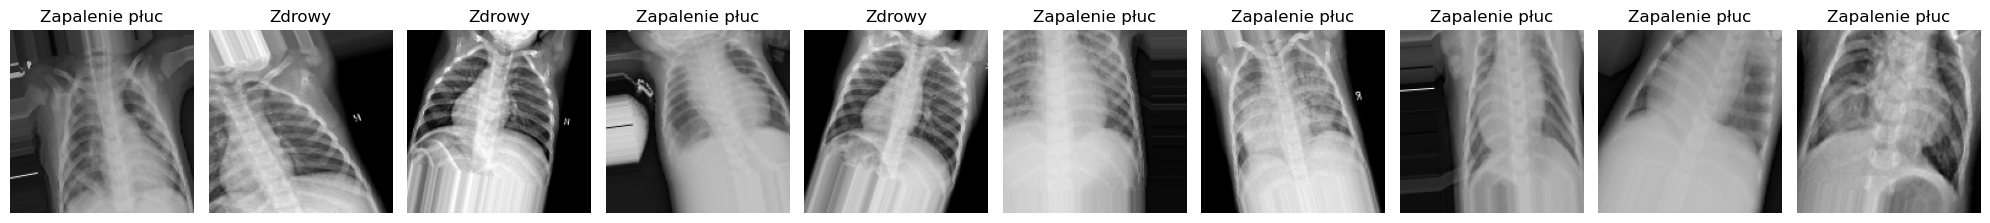

In [5]:
# Wizualizacja danych
def plot_images(images_arr, labels_arr, class_names):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, label, ax in zip(images_arr, labels_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(class_names[int(label)])
    plt.tight_layout()
    plt.show()

class_names = ['Zdrowy', 'Zapalenie płuc']
sample_training_images, sample_training_labels = next(train_generator)
plot_images(sample_training_images[:10], sample_training_labels[:10], class_names)


# Budowanie modelu sieci konwolucyjnej
Zbuduj model sieci konwolucyjnej przy użyciu Keras, definiując warstwy konwolucyjne, poolingowe i gęste.

In [ ]:
# Budowanie modelu sieci konwolucyjnej
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

d:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 74, 74, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 36, 36, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,073 (72.61 MB)

 Trainable params: 19,034,625 (72.61 MB)

 Non-trainable params: 448 (1.75 KB)

# Trenowanie modelu
Trenuj model na przygotowanych danych treningowych, określając liczbę epok, batch size i inne hiperparametry.

In [7]:
# Trenowanie modelu
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=2,
    callbacks=[early_stopping]
)

d:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 99s 593ms/step - accuracy: 0.7421 - loss: 0.9291 - val_accuracy: 0.5000 - val_loss: 22.3038
Epoch 2/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 95s 585ms/step - accuracy: 0.8509 - loss: 0.3793 - val_accuracy: 0.5000 - val_loss: 21.8167


# Wizualizacja wyników trenowania

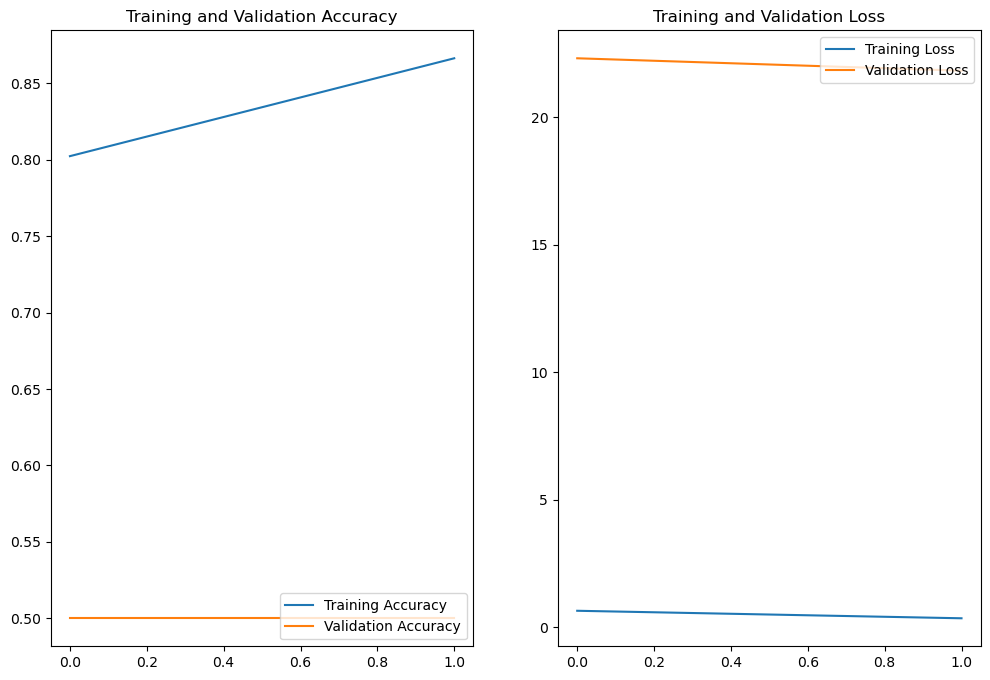

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Ocena modelu
Oceń wydajność modelu na zestawie testowym, obliczając metryki takie jak dokładność, precyzja, czułość i F1-score oraz wyświetlając macierz konfuzji.

In [9]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test accuracy: {test_acc:.2f}")

# Predykcje na zestawie testowym
y_pred = model.predict(test_generator)
y_pred_classes = np.where(y_pred > 0.5, 1, 0).flatten()
y_true = test_generator.classes

# Obliczanie metryk oceny
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)

print(f"Dokładność (Accuracy): {accuracy:.2f}")
print(f"Precyzja (Precision): {precision:.2f}")
print(f"Czułość (Recall): {recall:.2f}")
print(f"F1-score: {f1:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - accuracy: 0.2816 - loss: 32.6684
Test accuracy: 0.62
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step
Dokładność (Accuracy): 0.62
Precyzja (Precision): 0.62
Czułość (Recall): 1.00
F1-score: 0.77


# Macierz konfuzji

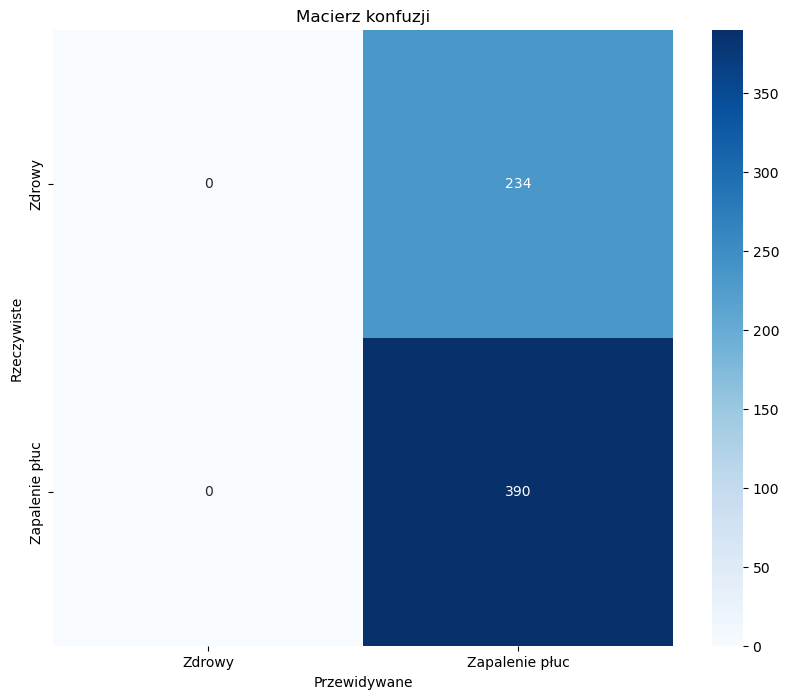

In [10]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Zdrowy', 'Zapalenie płuc'], yticklabels=['Zdrowy', 'Zapalenie płuc'])
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.title("Macierz konfuzji")
plt.show()